Epoch 1/50
3200/3200 [==============================] - 4s 1ms/step - loss: 5.7821 - val_loss: 0.4720
Epoch 2/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4809 - val_loss: 0.4356
Epoch 3/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4641 - val_loss: 0.4221
Epoch 4/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4535 - val_loss: 0.4077
Epoch 5/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4417 - val_loss: 0.6341
Epoch 6/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4370 - val_loss: 0.4678
Epoch 7/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4267 - val_loss: 0.3764
Epoch 8/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4227 - val_loss: 0.4028
Epoch 9/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4194 - val_loss: 0.4818
Epoch 10/50
3200/3200 [==============================] - 4s 1ms/step - loss: 0.412

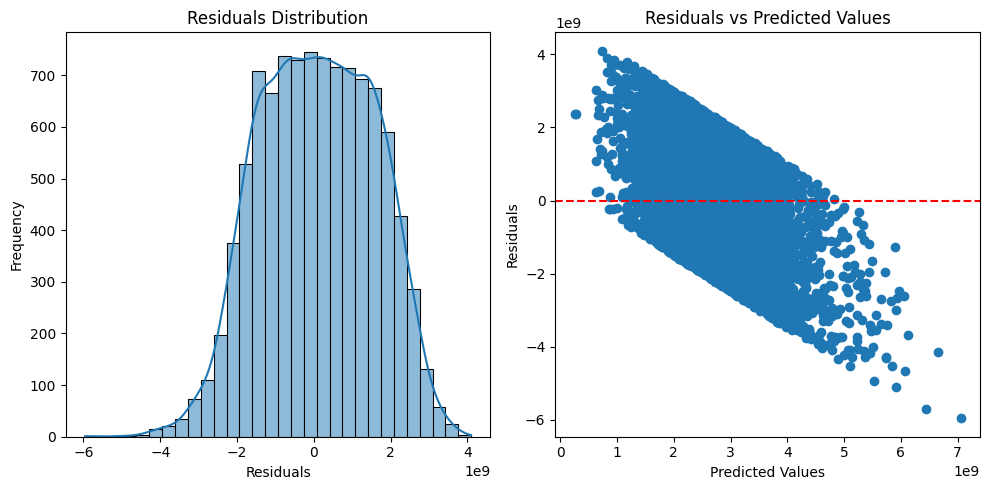

[[2.7346911e+09]
 [2.6957261e+09]
 [2.6745436e+09]
 [2.6744722e+09]
 [3.0717883e+09]
 [2.3761853e+09]
 [3.4085944e+09]
 [3.0271539e+09]
 [3.1559480e+09]
 [3.0750300e+09]]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r'C:\Users\Numan\Downloads\Football Teams Price.csv'
data = pd.read_csv(file_path)

# Dropping the unnecessary columns
data = data.drop(columns=['TeamFormation', 'Manager', 'HomeCity'])

# Convert Price to numeric (removing commas if present)
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Log transform the target variable to handle large values
data['Price'] = np.log1p(data['Price'])

# Separating features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Identifying categorical columns for one-hot encoding
categorical_cols = ['League', 'Country', 'PlayingStyle', 'StadiumType', 'MainSponsor', 'KitManufacturer', 'OwnershipType']

# Create a column transformer for the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_cols]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predictions
predictions = model.predict(X_test)

# Reverse the log transformation to get actual values
predictions_exp = np.expm1(predictions)
y_test_exp = np.expm1(y_test)

# Calculate residuals
residuals = y_test_exp - predictions_exp.flatten()

# Plot residuals
plt.figure(figsize=(10, 5))

# Residuals distribution plot
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Residuals vs Predicted values plot
plt.subplot(1, 2, 2)
plt.scatter(predictions_exp, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print first 10 predictions for inspection
print(predictions_exp[:10])
